# Titanic Survival Prediction

So today i am going to analyse the titanic data present in train.csv file to make a model that will predict the survival probability of the person on the ship.
So lets start!!!!!!!

What is the goal of this project?
- Predict survival on the Titanic

What is the target variable?
- Survived

What type of ML problem is this?
- Classification


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [89]:
print(train.shape)
print(test.shape)


(891, 12)
(418, 11)


In [90]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the test dataset we need to predict the survival of the people. So test doesnt have the survival column

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
100-((714/891)*100)

19.86531986531986

Train have 19.86% of NAN age Embarked Locations

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [95]:
100-((332/418)*100)

20.57416267942584

Same for test having 20.57% NAN values

In [96]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
eg=train.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [98]:

eg

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [99]:
#LEts look for correlation
import seaborn as sns

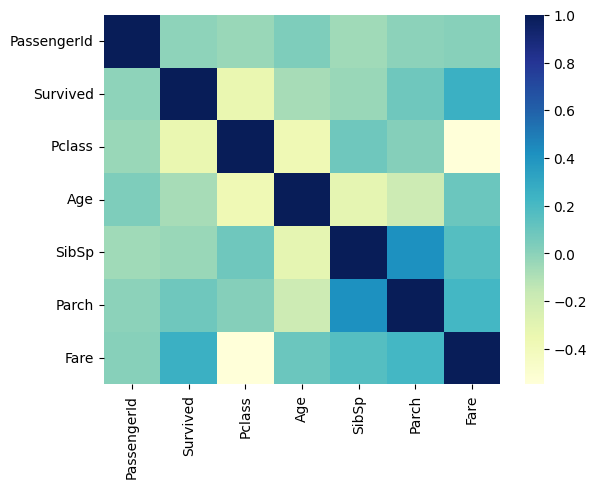

In [100]:
sns.heatmap(eg.corr(),cmap="YlGnBu")
plt.show()

StratifiedShuffleSplit is a class in scikit-learn used to split a dataset into train/test sets while preserving the class distribution (stratification) and shuffling the data.
"Stratified" = ensures that each class is approximately equally represented in both training and test sets.

For example:

Suppose your dataset has 90% class A and 10% class B.

A normal random split might imbalance this.

Stratified split ensures both sets have ~90% A and ~10% B.

"Shuffle" = it shuffles before splitting, ensuring randomness.

Why use StratifiedShuffleSplit?
✅ Better than train_test_split if your classes are imbalanced.
✅ Ensures consistent representation of all classes.
✅ Shuffling adds randomness while maintaining stratification.


In [101]:
from sklearn.model_selection import StratifiedShuffleSplit

In [102]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(train,train[["Survived",'Pclass','Sex']]):
  s_train=train.loc[train_indices]
  s_val=train.loc[test_indices]

In [103]:
s_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C


In [104]:
s_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


<Axes: >

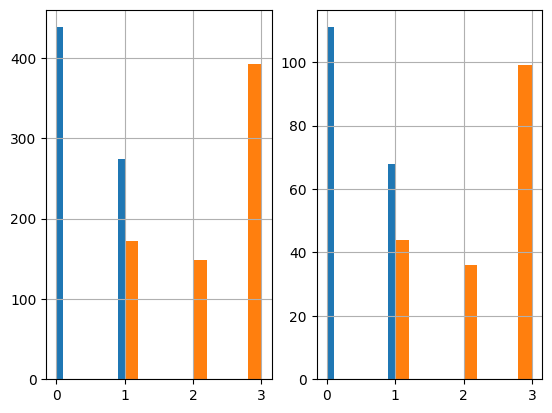

In [105]:
plt.subplot(1,2,1)
s_train['Survived'].hist()
s_train['Pclass'].hist()

plt.subplot(1,2,2)
s_val['Survived'].hist()
s_val['Pclass'].hist()

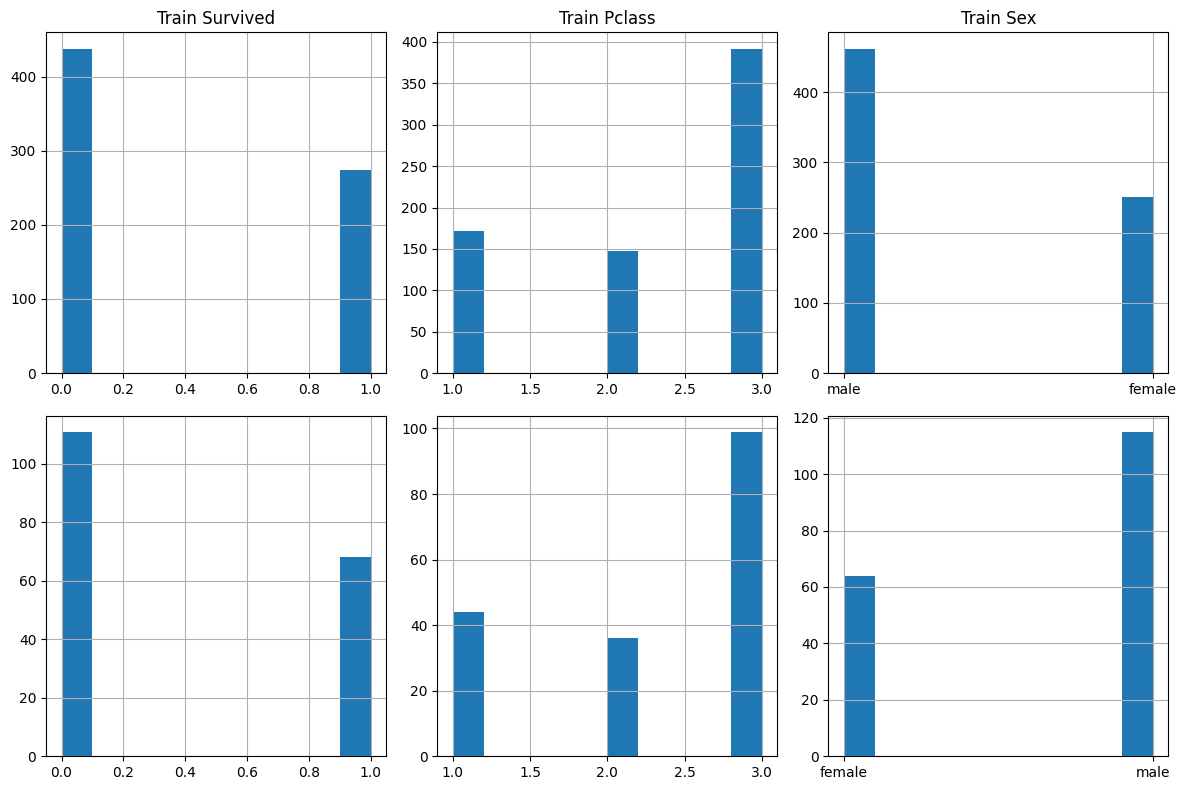

In [106]:
fig,axes=plt.subplots(2,3,figsize=(12,8))

#Train
s_train['Survived'].hist(ax=axes[0,0])
axes[0,0].set_title("Train Survived")
s_train['Pclass'].hist(ax=axes[0,1])
axes[0,1].set_title('Train Pclass')
s_train['Sex'].hist(ax=axes[0,2])
axes[0,2].set_title('Train Sex')

#Test
s_val['Survived'].hist(ax=axes[1,0])
axes[0,0].set_title("Train Survived")
s_val['Pclass'].hist(ax=axes[1,1])
axes[0,1].set_title('Train Pclass')
s_val['Sex'].hist(ax=axes[1,2])
axes[0,2].set_title('Train Sex')

plt.tight_layout()
plt.show()

In [107]:
s_train.info()
#age is missing for alot of data

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 50 to 145
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


" sklearn.base"
This is a submodule in scikit-learn.

It contains base classes and mixins that you can inherit from to build custom scikit-learn transformers or estimators.

"BaseEstimator"
✔️ A base class that you can inherit from to make your own estimator (like transformers or models).
✔️ Provides standard methods for free:

.get_params()

.set_params()

Useful for grid search, pipelines, cross-validation.

TransformerMixin
✔️ A mixin class that adds a .fit_transform() method automatically.

If you inherit from it, you only need to implement:

.fit()

.transform()

2️⃣ from sklearn.impute import SimpleImputer
🔹 sklearn.impute
Submodule for handling missing values.

✅ SimpleImputer
✔️ A built-in scikit-learn transformer.
✔️ Used to fill in missing values in your data.

✅ How does it work?

You choose a strategy:

"mean": replace missing with column mean

"median"

"most_frequent"

"constant"

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [109]:
class AgeImputer(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.imputer=SimpleImputer(strategy='mean')

  def fit(self,x,y=None):
    self.imputer.fit(x[['Age']])
    return self
  
  def transform(self,x):
    x=x.copy()
    x['Age']=self.imputer.transform(x[['Age']])
    return x

What is sklearn.preprocessing?
A submodule of scikit-learn.

Contains tools for preprocessing data:

Scaling

Normalizing

Encoding categorical variables

etc.

What is OneHotEncoder?
✔️ It is a class in scikit-learn for converting categorical variables into numerical format.
✔️ Specifically: it does one-hot encoding.

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
# class FeatureEncoder(BaseEstimator, TransformerMixin):
#   def fit(self,x,y=None):
#     return self

#   def transform(self,x):
#     encoder=OneHotEncoder()
#     matrix=encoder.fit_transform(x[["Embarked"]]).toarray()

#     column_names=['C','S','Q','N']

#     for i in range(len(matrix.T)):
#       x[column_names[i]]=matrix.T[i]


#     matrix=encoder.fit_transform(x[["Sex"]]).toarray()

#     column_names=['Female','Male']
#     for i in range(len(matrix.T)):
#       x[column_names[i]]=matrix.T[i]

#     return x

In [112]:
#Adds new columns to your DataFrame with one-hot encoded versions of "Embarked" and "Sex", so your ML model can use them.
class FeatureEncoder(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.embarked_encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
    self.sex_encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

  def fit(self,x,y=None):
    self.embarked_encoder.fit(x[["Embarked"]])
    self.sex_encoder.fit(x[["Sex"]])
    return self

  def transform(self,x):
    x=x.copy()
    embark_matrix=self.embarked_encoder.transform(x[["Embarked"]])
    embarked_cols=self.embarked_encoder.get_feature_names_out(['Embarked'])
    embarked_df = pd.DataFrame(embark_matrix, columns=embarked_cols, index=x.index)
    x = pd.concat([x, embarked_df], axis=1)


    sex_matrix=self.sex_encoder.transform(x[['Sex']])
    sex_cols=self.sex_encoder.get_feature_names_out(['Sex'])
    sex_df = pd.DataFrame(sex_matrix, columns=sex_cols, index=x.index)
    x = pd.concat([x, sex_df], axis=1)

    return x

In [113]:
#Your FeatureDropper is a custom step that removes unnecessary columns from your data so your model only uses the features you want.
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self,x,y=None):
    return self

  def transform(self,x):
    return x.drop(['Embarked','Name','Ticket','Cabin','Sex','Embarked_nan'],axis=1,errors='ignore')

What is sklearn.pipeline?
pipeline is a module in the scikit-learn library.

It contains tools for creating pipelines, which are a way to chain multiple data processing steps and modeling steps together.

✅ Purpose:

Automate and streamline machine learning workflows by combining all steps into one object.

In [114]:
from sklearn.pipeline import Pipeline


In [115]:
pipeline=Pipeline([
    ('ageimputer',AgeImputer()),
    ('featureencoder',FeatureEncoder()),
    ('featuredropper',FeatureDropper())
])

In [116]:
s_train=pipeline.fit_transform(s_train)

In [117]:
s_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
50,51,0,3,7.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
743,744,0,3,24.000000,1,0,16.1000,0.0,0.0,1.0,0.0,1.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
495,496,0,3,29.575389,0,0,14.4583,1.0,0.0,0.0,0.0,1.0
843,844,0,3,34.500000,0,0,6.4375,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
718,719,0,3,29.575389,0,0,15.5000,0.0,1.0,0.0,0.0,1.0
490,491,0,3,29.575389,1,0,19.9667,0.0,0.0,1.0,0.0,1.0
864,865,0,2,24.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
393,394,1,1,23.000000,1,0,113.2750,1.0,0.0,0.0,1.0,0.0


In [118]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 50 to 145
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_C   712 non-null    float64
 8   Embarked_Q   712 non-null    float64
 9   Embarked_S   712 non-null    float64
 10  Sex_female   712 non-null    float64
 11  Sex_male     712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [119]:
# Split your preprocessed data into features (x) and target (y).
# Scaled the features to have mean 0 and standard deviation 1.
# Converted everything to NumPy arrays for modeling.
from sklearn.preprocessing import StandardScaler

x=s_train.drop(['Survived'],axis=1)
y=s_train['Survived']

scaler=StandardScaler()
x_data=scaler.fit_transform(x)
y_data=y.to_numpy()

In [120]:
x_data

array([[-1.5563044 ,  0.82789342, -1.77941903, ...,  0.61848547,
        -0.73561236,  0.73561236],
       [ 1.13386264,  0.82789342, -0.43945878, ...,  0.61848547,
        -0.73561236,  0.73561236],
       [-1.73487249,  0.82789342,  0.42757432, ...,  0.61848547,
        -0.73561236,  0.73561236],
       ...,
       [ 1.60357435, -0.37019624, -0.43945878, ...,  0.61848547,
        -0.73561236,  0.73561236],
       [-0.22480758, -1.56828591, -0.51827997, ..., -1.61685287,
         1.35941164, -1.35941164],
       [-1.18752249, -0.37019624, -0.83356473, ...,  0.61848547,
        -0.73561236,  0.73561236]], shape=(712, 11))

✔️ RandomForestClassifier: Your actual model (many trees → better prediction).
✔️ GridSearchCV: Tool to find the best settings for that model automatically.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [122]:
clf=RandomForestClassifier()
param_grid=[
    {"n_estimators": [10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data,y_data)
#You are telling scikit-learn:
# “Try all combinations of these RandomForest hyperparameters. Evaluate each with 3-fold cross-validation. Find me the one with the best accuracy.”

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [123]:
final_clf=grid_search.best_estimator_

In [124]:
final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [125]:
s_val=pipeline.fit_transform(s_val)

In [126]:
s_val

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
577,578,1,1,39.000000,1,0,55.9000,0.0,0.0,1.0,1.0,0.0
262,263,0,1,52.000000,1,1,79.6500,0.0,0.0,1.0,0.0,1.0
228,229,0,2,18.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
601,602,0,3,30.172297,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
39,40,1,3,14.000000,1,0,11.2417,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
811,812,0,3,39.000000,0,0,24.1500,0.0,0.0,1.0,0.0,1.0
632,633,1,1,32.000000,0,0,30.5000,1.0,0.0,0.0,0.0,1.0
547,548,1,2,30.172297,0,0,13.8625,1.0,0.0,0.0,0.0,1.0
46,47,0,3,30.172297,1,0,15.5000,0.0,1.0,0.0,0.0,1.0


In [129]:
x_val=s_val.drop(['Survived'],axis=1)
y_val=s_val['Survived']

scaler=StandardScaler()
x_data_val=scaler.fit_transform(x_val)
y_data_val=y_val.to_numpy()

In [130]:
x_data_val

array([[ 6.11601224e-01, -1.55750997e+00,  6.24105148e-01, ...,
         6.22572806e-01,  1.34047566e+00, -1.34047566e+00],
       [-6.27222464e-01, -1.55750997e+00,  1.54318537e+00, ...,
         6.22572806e-01, -7.46003847e-01,  7.46003847e-01],
       [-7.60936767e-01, -3.66081404e-01, -8.60562897e-01, ...,
         6.22572806e-01, -7.46003847e-01,  7.46003847e-01],
       ...,
       [ 4.93618015e-01, -3.66081404e-01, -2.51171451e-16, ...,
        -1.60623784e+00, -7.46003847e-01,  7.46003847e-01],
       [-1.47670156e+00,  8.25347166e-01, -2.51171451e-16, ...,
        -1.60623784e+00, -7.46003847e-01,  7.46003847e-01],
       [ 2.96979335e-01,  8.25347166e-01, -2.51171451e-16, ...,
         6.22572806e-01, -7.46003847e-01,  7.46003847e-01]],
      shape=(179, 11))

In [131]:
final_clf.score(x_data_val,y_data_val)

0.8379888268156425

In [132]:
#using the complete training set to train our model 
final_train=pipeline.fit_transform(train)

In [133]:
final_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [134]:
x_final=final_train.drop(['Survived'],axis=1)
y_final=final_train['Survived']

scaler=StandardScaler()
x_data_final=scaler.fit_transform(x_final)
y_data_final=y_final.to_numpy()

In [135]:
prod_clf=RandomForestClassifier()
param_gird=[
    {"n_estimators": [10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(prod_clf,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [136]:
prod_final_clf=grid_search.best_estimator_

In [137]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)

In [138]:
final_test_data=pipeline.fit_transform(test)

In [139]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [141]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked_C   418 non-null    float64
 7   Embarked_Q   418 non-null    float64
 8   Embarked_S   418 non-null    float64
 9   Sex_female   418 non-null    float64
 10  Sex_male     418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [142]:
x_final_test=final_test_data
x_final_test=x_final_test.fillna(method='ffill')

scaler=StandardScaler()
x_data_final_test=scaler.fit_transform(x_final_test)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7564\1780209167.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_final_test=x_final_test.fillna(method='ffill')


In [143]:
predictions=prod_final_clf.predict(x_data_final_test)

In [144]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [145]:
final_df=pd.DataFrame(test['PassengerId'])
final_df['Survived']=predictions
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [146]:
final_df.to_csv("prediction1.csv",index=False)